# K-nearest neighbour (KNN)

In [123]:
# Emample of KNN classifier on 'iris' data using sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
# load the dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [125]:
# split the data into X and y
X = df.drop('species', axis=1)
y = df['species']

In [126]:
# load and fit the KNN classifier on the data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

# predict the speices for a new set of measurments
new_measurments = np.array([[5.1, 3.5, 1.4, 0.2]])
knn.predict(new_measurments)

c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [127]:
# train test split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the model on the training data
knn.fit(X_train, y_train)

# predict the species for the test data
y_pred = knn.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print('classfication report:\n', classification_report(y_test, y_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))

classfication report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


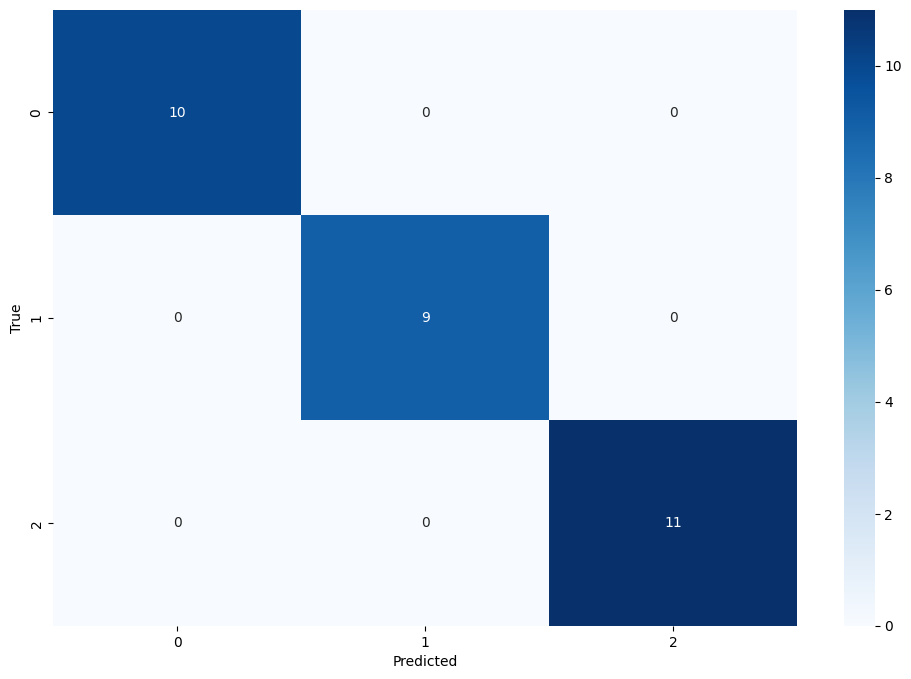

In [128]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Regression using KNN

In [134]:
# Regression problem on tips dataset

# load the dataset
tips = sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [135]:
# split the data into X and y
X = tips.drop('tip', axis=1)
y = tips['tip']

In [136]:
# encode the categorical column using for loop and Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])

In [137]:
# train test split the data and run the model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)

# fit the training data on the model
model.fit(X_train, y_train)

# predict the tip for the test data
y_pred = model.predict(X_test)

# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error',mean_squared_error(y_test,y_pred))
print('R2 Score',r2_score(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean squared error 0.8382265306122448
R2 Score 0.3294034029001649
RMSE 0.9155471209130881


In [139]:
X_test.head()

,total_bill,sex,smoker,day,time,size
24,19.82,1,0,1,0,2
6,8.77,1,0,2,0,2
153,24.55,1,0,2,0,4
211,25.89,1,1,1,0,4
198,13.00,0,1,3,1,2


In [143]:
# predict the specific value
model.predict([[50, 1, 0, 1, 1, 10]])

c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([6.346])